# How to get into graduate school ?

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Graduate Admissions Dataset
To estimate chances of graduate admission from an Indian perspective. Our analysis will help us in understand what factors are important in graduate admissions and how these factors are interrelated among themselves. It will also help predict one's chances of admission given the rest of the variables.
Lets load the dataset and take a look at it

In [ ]:
#To load the dataset

df=pd.read_csv("/content/drive/MyDrive/ItVedantPythonAWPClasswork/csv datasets/Admission_Predict.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


# About this Dataset
This dataset is created for prediction of Graduate Admissions from an Indian perspective.
Content: The dataset contains several parameters which are considered important during the application for Masters Programs.

The parameters included are :

1.GRE Scores ( out of 340 )
2.TOEFL Scores ( out of 120 )
3.University Rating ( out of 5 )
4.Statement of Purpose and Letter of Recommendation Strength ( out of 5 )
5.Undergraduate GPA ( out of 10 )
6.Research Experience ( either 0 or 1 )
7.Chance of Admit ( ranging from 0 to 1 )

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Inspiration :
This dataset was built with the purpose of helping students in shortlisting universities with their profiles. 
The predicted output gives them a fair idea about their chances for a particular university.

In [ ]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [ ]:
df['Chance of Admit '].unique()

array([0.92, 0.76, 0.72, 0.8 , 0.65, 0.9 , 0.75, 0.68, 0.5 , 0.45, 0.52,
       0.84, 0.78, 0.62, 0.61, 0.54, 0.66, 0.63, 0.64, 0.7 , 0.94, 0.95,
       0.97, 0.44, 0.46, 0.74, 0.91, 0.88, 0.58, 0.48, 0.49, 0.53, 0.87,
       0.86, 0.89, 0.82, 0.56, 0.36, 0.42, 0.47, 0.55, 0.57, 0.96, 0.93,
       0.38, 0.34, 0.79, 0.71, 0.69, 0.59, 0.85, 0.77, 0.81, 0.83, 0.67,
       0.73, 0.6 , 0.43, 0.51, 0.39])

In [ ]:
df['Target']=np.where(df['Chance of Admit ']>=.50,1,0)

In [ ]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Target
0,1,337,118,4,4.5,4.5,9.65,1,0.92,1
1,2,324,107,4,4.0,4.5,8.87,1,0.76,1
2,3,316,104,3,3.0,3.5,8.00,1,0.72,1
3,4,322,110,3,3.5,2.5,8.67,1,0.80,1
4,5,314,103,2,2.0,3.0,8.21,0,0.65,1


In [ ]:
# Drop column Cabin as it null values more than 50%
df.drop('Chance of Admit ',inplace=True,axis=1)
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Target'],
      dtype='object')

In [ ]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Target
0,1,337,118,4,4.5,4.5,9.65,1,1
1,2,324,107,4,4.0,4.5,8.87,1,1
2,3,316,104,3,3.0,3.5,8.00,1,1
3,4,322,110,3,3.5,2.5,8.67,1,1
4,5,314,103,2,2.0,3.0,8.21,0,1


In [ ]:
df['Target'].unique()

array([1, 0])

In [ ]:
df['Target'].value_counts()

1    367
0     33
Name: Target, dtype: int64

In [ ]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Target               0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Target
0,1,337,118,4,4.5,4.5,9.65,1,1
1,2,324,107,4,4.0,4.5,8.87,1,1
2,3,316,104,3,3.0,3.5,8.00,1,1
3,4,322,110,3,3.5,2.5,8.67,1,1
4,5,314,103,2,2.0,3.0,8.21,0,1


In [ ]:
#select input and output
X=df.drop('Target',axis=1) #input
Y=df['Target'] #output

In [ ]:
X.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1,337,118,4,4.5,4.5,9.65,1
1,2,324,107,4,4.0,4.5,8.87,1
2,3,316,104,3,3.0,3.5,8.00,1
3,4,322,110,3,3.5,2.5,8.67,1
4,5,314,103,2,2.0,3.0,8.21,0


In [ ]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Target, dtype: int64

In [ ]:
#split train test
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [ ]:
#standard scaller on inputdata
#X train and  X_test
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

# logistic regression 
#create a model with logistics  regression why?
#because we want to  predict the value of yes / no  means we have

In [ ]:
#logistic regression 
#create a model with logistics  regression why?
#because we want to  predict the value of yes / no  means we have
#classification dataset
#call inbuilt class logiscit regression
from sklearn.linear_model import LogisticRegression

In [ ]:
#create the dataset of logisticregression
lr=LogisticRegression()

In [ ]:
#scaling is importent
#train the model with 70% data, use fit() inbuilt method
lr.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
#Test the model with 30% data, use inbuilt method predict() 
Y_pred=lr.predict(X_test) #Y_pred=1/(1+np.exp(-x))
Y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1])

In [ ]:
#create a dict 
dict={'Actual output':Y_test,'Predicted output':Y_pred}
df2=pd.DataFrame(dict)
df2.head()  

,Actual output,Predicted output
398,1,1
125,1,1
328,1,1
339,1,1
172,1,1


In [ ]:
#check the accuracy of model, we use inbuilt method score() of logisticregression
lr.score(X_test,Y_test) #score is always between 0 to 1,,, near 1 is considered as good 
#near 0 is considered as bad , near 0.5 is okay

0.9333333333333333

In [ ]:
#generate classification report
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [ ]:
print(classification_report(Y_test,Y_pred))
#recall of 1 
#lr.score = f1-score

              precision    recall  f1-score   support

           0       0.86      0.46      0.60        13
           1       0.94      0.99      0.96       107

    accuracy                           0.93       120
   macro avg       0.90      0.73      0.78       120
weighted avg       0.93      0.93      0.92       120



In [ ]:
print(confusion_matrix(Y_test,Y_pred))
''' 
[TP FP
 FN TN]
'''

[[  6   7]
 [  1 106]]


' \n[TP FP\n FN TN]\n'

# report
#this model is not accurate as the value of 0 is only 46%

#Clearly Data is imbalance
#here, there are 2 classes : first class : 0 means Chance of Admit is <=50
#and second class : 1 means Chance of Admit >=50
#here majority class : 1(367 samples) and minority class : 0(33 samples)
#Here we have to balance of both classes
#means here we have to use sampling technique for baqlance of 2 classes
#There are 2 types of sampling technique :-
#1. RandomOverSampling :  in this sampling , converts minority class into
#majority class
#2. RandonUnderSampling : in this sampling , converts majority class into
#minority class

# First install inbuilt package imblearn  
#!pip install imblearn

In [ ]:
#RandomOverSampler : inbuilt class : to increase means create duplicate 
#records of minority class which equal to majority class
from imblearn.over_sampling import RandomOverSampler

In [ ]:
#how many samples of 0 and 1 class in Y_train
Y_train.value_counts()


1    260
0     20
Name: Target, dtype: int64

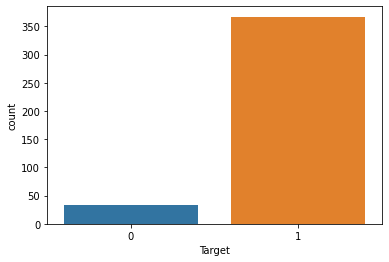

In [ ]:
import seaborn as sns
sns.countplot(x = "Target", data = df)

In [ ]:
#Apply RandomOverSampler
#create object of RandomOverSampler class
ros=RandomOverSampler(random_state=1) #random state is used as the data dont get shuffeled again and again


In [ ]:
#use inbuilt method fit_resample() of RandomOverSampler class
X_train_ros,Y_train_ros=ros.fit_resample(X_train,Y_train) #we dont overwrite the train coz
#we might use  deleting the mijority data to make it minority data



In [ ]:
#check 
Y_train_ros.value_counts()

0    260
1    260
Name: Target, dtype: int64

In [ ]:
#testing data , but first check 
Y_test.value_counts()

1    107
0     13
Name: Target, dtype: int64

In [ ]:
#apply randomoversampler on testing data
X_test_ros,Y_test_ros=ros.fit_resample(X_test,Y_test)

In [ ]:
#check count
Y_test_ros.value_counts()

1    107
0    107
Name: Target, dtype: int64

In [ ]:
#create a function
def create_model(model):
  model.fit(X_train_ros,Y_train_ros) #train the model with 70%data
  y_pred=model.predict(X_test_ros) #test the model with 30% data
  print(classification_report(Y_test_ros,y_pred)) #generate report
  print(confusion_matrix(Y_test_ros,y_pred))
  return model

# Use baseline model LogisticRegression

In [ ]:
#model perform with Logistic regression class
from sklearn.linear_model import LogisticRegression

In [ ]:
#create an object of LogisticRegression class
lr=LogisticRegression()

In [ ]:
#call function
lr=create_model(lr)

              precision    recall  f1-score   support

           0       0.88      0.87      0.87       107
           1       0.87      0.88      0.87       107

    accuracy                           0.87       214
   macro avg       0.87      0.87      0.87       214
weighted avg       0.87      0.87      0.87       214

[[93 14]
 [13 94]]


# Now doing with Decisiom Tree for better accuracy

In [ ]:
#Next  apply DecisionTreeClassifier class 
#perform dataset with the help of DecisionTreeClassifier 
#call DecisionTreeClassifier class
from sklearn.tree import DecisionTreeClassifier

#create the object of DecisionTreeClassifier class
dt=DecisionTreeClassifier(random_state=1) #by default Gini index 
#means find loss : 1-P*2-Q*2

In [ ]:
#call function
dt=create_model(dt)


              precision    recall  f1-score   support

           0       0.90      0.34      0.49       107
           1       0.59      0.96      0.73       107

    accuracy                           0.65       214
   macro avg       0.75      0.65      0.61       214
weighted avg       0.75      0.65      0.61       214

[[ 36  71]
 [  4 103]]


In [ ]:
#show the information gain of allinpit feature
IG=dt.feature_importances_ #featuee importance inbuilt method of Decisiom Tre classfifer

print('information Gain :',IG)

information Gain : [0.08184126 0.07501828 0.         0.01432834 0.09380452 0.05978247
 0.67522513 0.        ]


In [ ]:
X.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research'],
      dtype='object')

In [ ]:
#create dictionary
dict={'input':X.columns,'IG':IG}
df1=pd.DataFrame(dict)
df1
df1.sort_values('IG',ascending=False )#descending order according to iG

,input,IG
6,CGPA,0.675225
4,SOP,0.093805
0,Serial No.,0.081841
1,GRE Score,0.075018
5,LOR,0.059782
3,University Rating,0.014328
2,TOEFL Score,0.000000
7,Research,0.000000


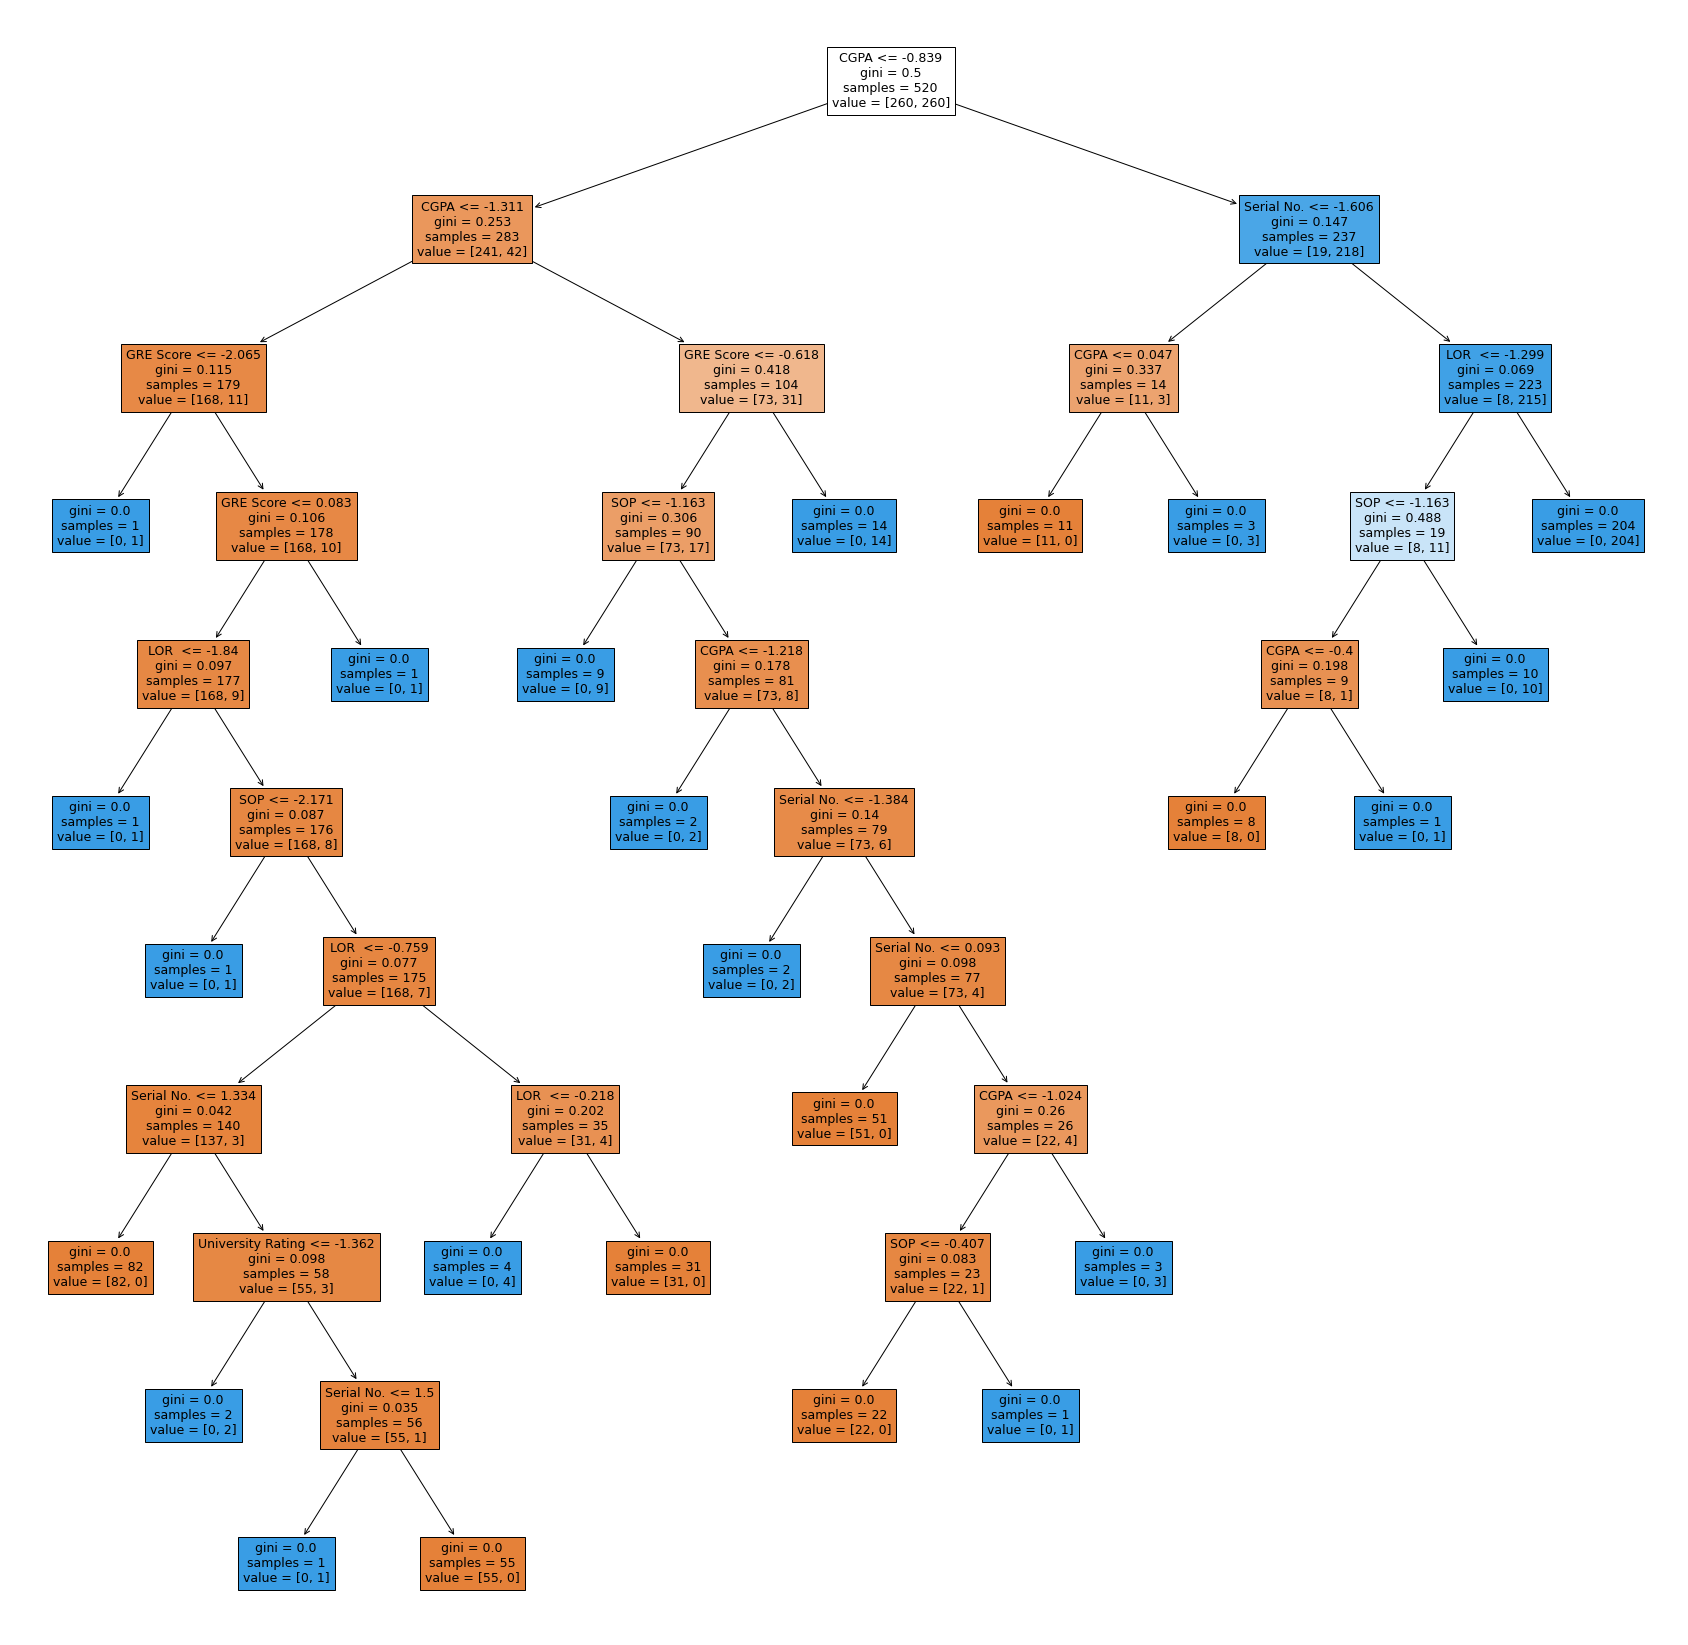

In [ ]:
#create the tree 
from sklearn import tree
features=X.columns #input features
fig=plt.figure(figsize=(30,30))
_=tree.plot_tree(dt,feature_names=features,filled=True)

# pruning technique
#max depth(reduce overfitting)
#pruning technique
#max_depth : - #Note : max_depth can not more than 8
#1. max_depth parameter 
##create object of DecisionTreeClassifier class and passing the parameter
#max_depth

In [ ]:
#create objet of Decisiom TREE classifier class and passing the parameter
#maxdepth

dt1=DecisionTreeClassifier(random_state=1,max_depth=3)

In [ ]:
#call the function
dt1=create_model(dt1)

              precision    recall  f1-score   support

           0       0.84      0.60      0.70       107
           1       0.69      0.89      0.78       107

    accuracy                           0.74       214
   macro avg       0.77      0.74      0.74       214
weighted avg       0.77      0.74      0.74       214

[[64 43]
 [12 95]]


In [ ]:
#create objet of Decisiom TREE classifier class and passing the parameter
#maxdepth

dt2=DecisionTreeClassifier(random_state=1,max_depth=6)

In [ ]:
#call the function
dt2=create_model(dt2)

              precision    recall  f1-score   support

           0       0.82      0.34      0.48       107
           1       0.58      0.93      0.71       107

    accuracy                           0.63       214
   macro avg       0.70      0.63      0.60       214
weighted avg       0.70      0.63      0.60       214

[[36 71]
 [ 8 99]]


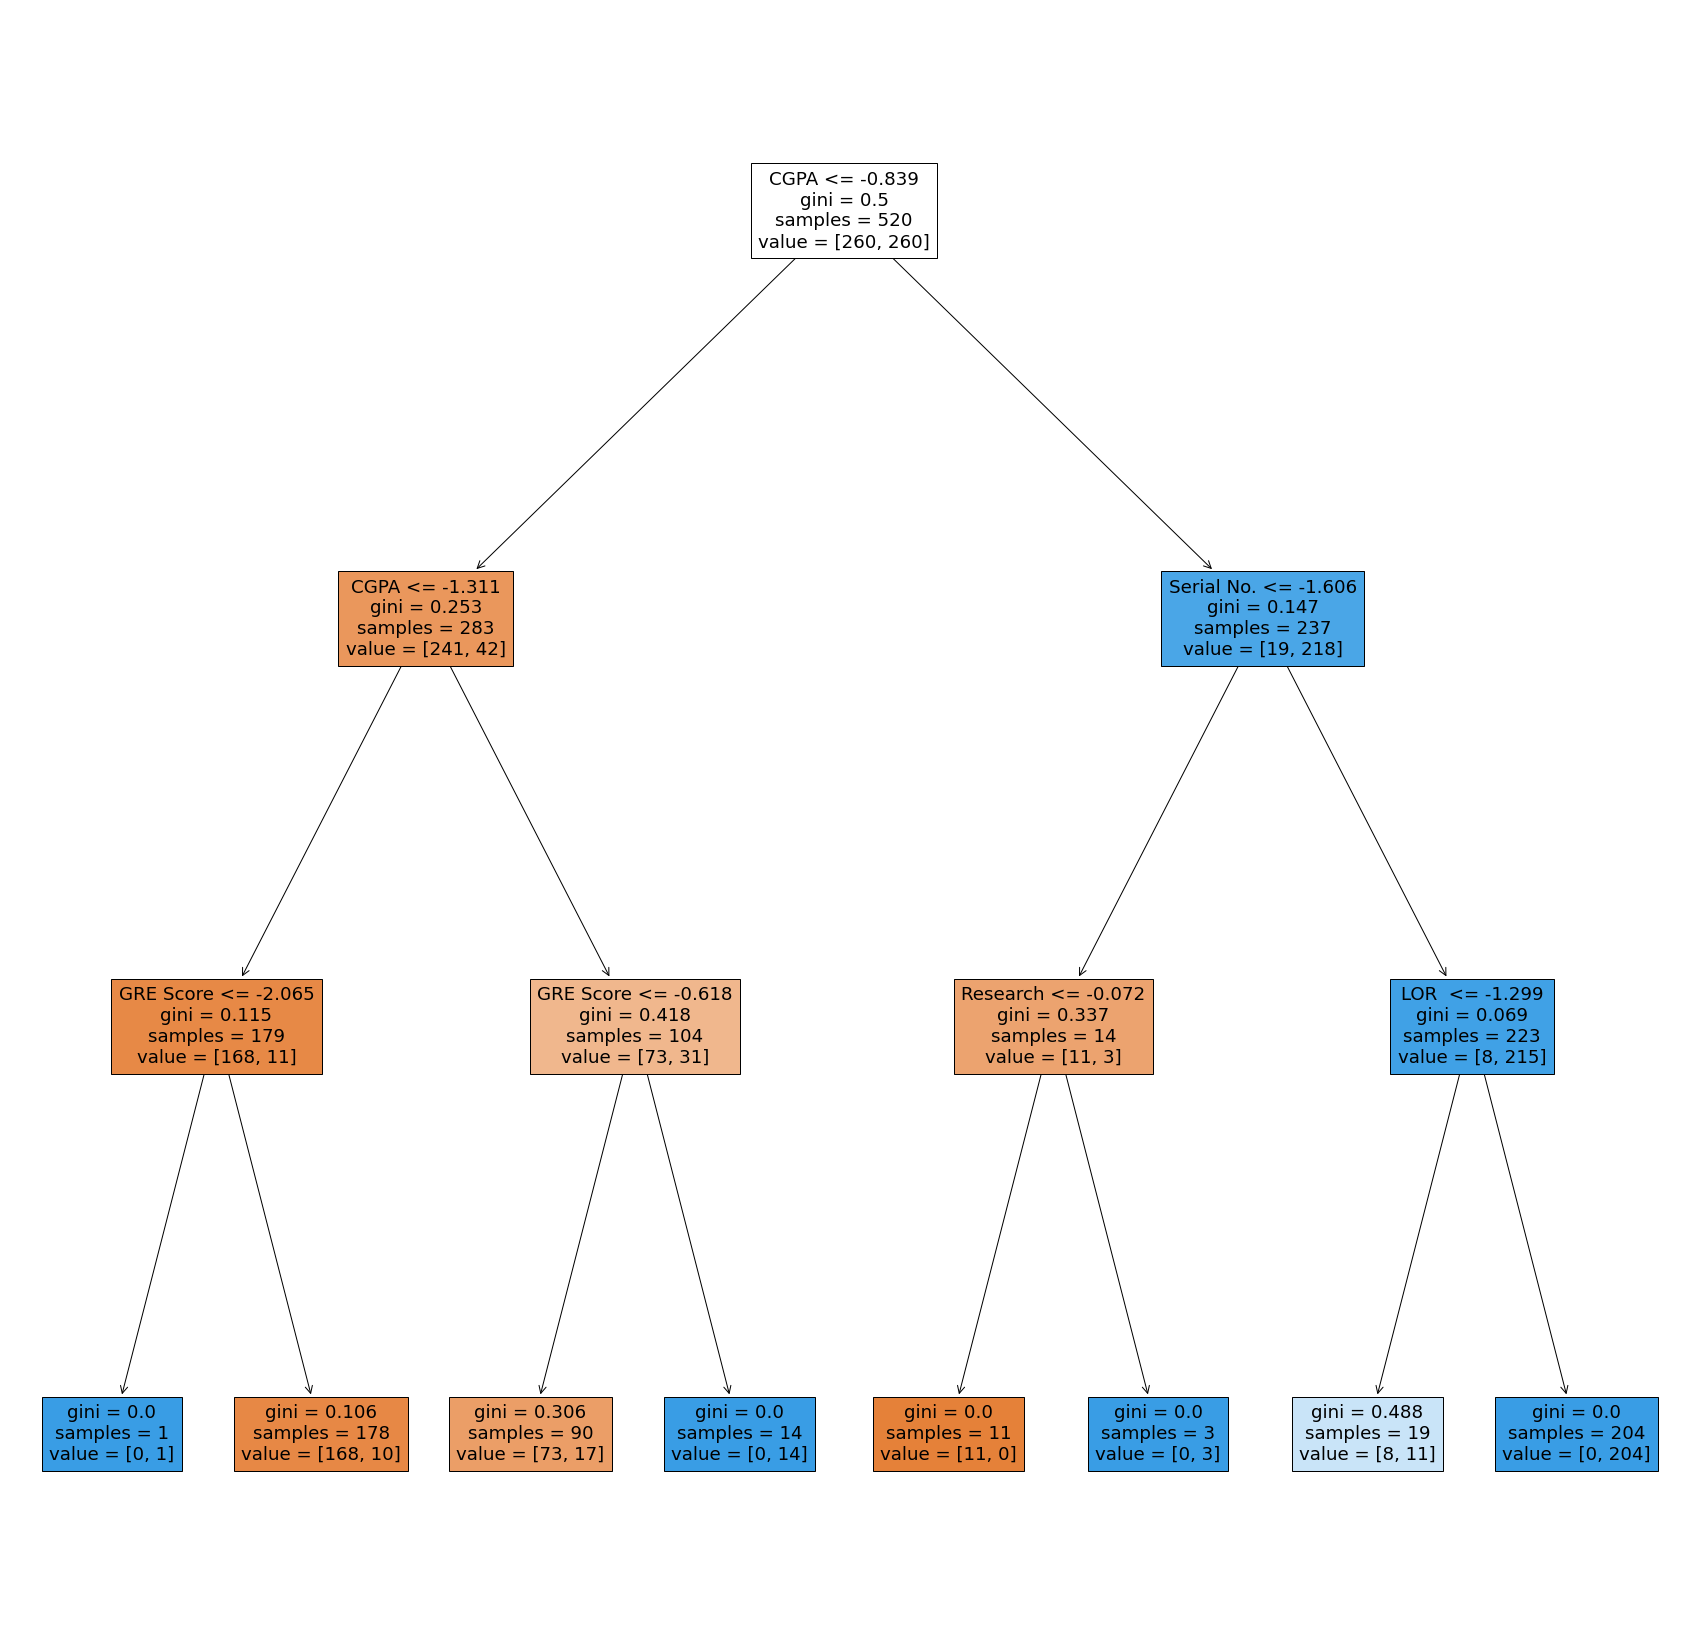

In [ ]:
#create the tree 
from sklearn import tree
features=X.columns #input features
fig=plt.figure(figsize=(30,30))
_=tree.plot_tree(dt1,feature_names=features,filled=True)

In [ ]:
#create a dictrony IG information gain 
IG=dt1.feature_importances_
dict={'Input':X.columns,'IG':IG} 
df1=pd.DataFrame(dict)
df1.sort_values('IG',ascending=False) #decending order according to IG
df1.head()

,Input,IG
0,Serial No.,0.072514
1,GRE Score,0.086709
2,TOEFL Score,0.000000
3,University Rating,0.000000
4,SOP,0.000000


# 2nd purning technique : min_samples_leaf
#min_samples_leaf =45 or more means not less than=45 and max=100
##create object of DecisionTreeClassifier class
#leaf node means no child

In [ ]:
'''
for i in range(45,100,5):
  print('Min Sample Leaf:-',i)
  dt2=DecisionTreeClassifier(random_state=1,min_samples_leaf=i) #by default gini
  #call function
  dt2=create_model(dt2)
'''

"\nfor i in range(45,100,5):\n  print('Min Sample Leaf:-',i)\n  dt2=DecisionTreeClassifier(random_state=1,min_samples_leaf=i) #by default gini\n  #call function\n  dt2=create_model(dt2)\n"

In [ ]:
dt2=DecisionTreeClassifier(random_state=1,min_samples_leaf=45) #by default gini
#call function
dt2=create_model(dt2)

              precision    recall  f1-score   support

           0       0.84      0.73      0.78       107
           1       0.76      0.86      0.81       107

    accuracy                           0.79       214
   macro avg       0.80      0.79      0.79       214
weighted avg       0.80      0.79      0.79       214

[[78 29]
 [15 92]]


In [ ]:
'''for i in range(45,100,5):
  print('Min Sample Leaf:-',i)
  dt2=DecisionTreeClassifier(random_state=1,min_samples_leaf=i,criterion='entropy') 
  #change to entropy
  #call function
  dt2=create_model(dt2)
'''

"for i in range(45,100,5):\n  print('Min Sample Leaf:-',i)\n  dt2=DecisionTreeClassifier(random_state=1,min_samples_leaf=i,criterion='entropy') \n  #change to entropy\n  #call function\n  dt2=create_model(dt2)\n"

In [ ]:
dt2=DecisionTreeClassifier(random_state=1,min_samples_leaf=70,criterion='entropy') 
#change to entropy
#call function
dt2=create_model(dt2)

              precision    recall  f1-score   support

           0       0.84      0.73      0.78       107
           1       0.76      0.86      0.81       107

    accuracy                           0.79       214
   macro avg       0.80      0.79      0.79       214
weighted avg       0.80      0.79      0.79       214

[[78 29]
 [15 92]]


# use Ensembling Technique 
#RandomForestTree
'''
Train the dataset on multiple decisiontreeclassifier 
algorithm 
'''
#Random Forest Tree 
#call Random Forest Tree from package

#ensemble means to train the same dataset from
#multiple algorithm

# RandomForestTree

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X.shape

(400, 8)

In [ ]:
#create object of RandomForestClassifier tree
#decision tree is understood by RandomForestClassifier by default algo
'''for i in range(10,101):
  rfc=RandomForestClassifier(n_estimators=i,random_state=1)
  #here n_estimators means take how many no. of decisiontree 10 to 100
  #max_features means take how many input
  #bydefault gini
  #call function
  
  print('no n_estimators :-',i)
  rfc=create_model(rfc)
  #odd no. means hard voting
  #even means soft voting
'''

"for i in range(10,101):\n  rfc=RandomForestClassifier(n_estimators=i,random_state=1)\n  #here n_estimators means take how many no. of decisiontree 10 to 100\n  #max_features means take how many input\n  #bydefault gini\n  #call function\n  \n  print('no n_estimators :-',i)\n  rfc=create_model(rfc)\n  #odd no. means hard voting\n  #even means soft voting\n"

In [ ]:
rfc=RandomForestClassifier(n_estimators=11,max_features=5,random_state=1)
rfc=create_model(rfc)

              precision    recall  f1-score   support

           0       0.90      0.40      0.55       107
           1       0.61      0.95      0.75       107

    accuracy                           0.68       214
   macro avg       0.76      0.68      0.65       214
weighted avg       0.76      0.68      0.65       214

[[ 43  64]
 [  5 102]]


In [ ]:
rfc=RandomForestClassifier(n_estimators=11,max_features=5,random_state=1,criterion='entropy')
rfc=create_model(rfc)

              precision    recall  f1-score   support

           0       0.89      0.52      0.66       107
           1       0.66      0.93      0.78       107

    accuracy                           0.73       214
   macro avg       0.78      0.73      0.72       214
weighted avg       0.78      0.73      0.72       214

[[ 56  51]
 [  7 100]]


# Boosting Tech = 1. Gradient Boost technuique

In [ ]:
#Boosting Technique  : it is also Ensembling tech .
#1. gradient Boost technuique : second tech. of Boosting Ensembling technique 
# GB  : - its create a fully grown tree.this algorithm is focus on short comings 
#short comings means error

In [ ]:
# Call GradientBoostingClassifier class from following package.
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# Create an object of GradientBoosting class.
for i in range(1,100):
    # create an object of GradientBoostingClassifier class
    gbc=GradientBoostingClassifier(random_state=1,n_estimators=i)
    # Call the function
    print('No of Decision Tree : ',i)
    gbc=create_model(gbc)

No of Decision Tree :  1
              precision    recall  f1-score   support

           0       0.84      0.60      0.70       107
           1       0.69      0.89      0.78       107

    accuracy                           0.74       214
   macro avg       0.77      0.74      0.74       214
weighted avg       0.77      0.74      0.74       214

[[64 43]
 [12 95]]
No of Decision Tree :  2
              precision    recall  f1-score   support

           0       0.83      0.41      0.55       107
           1       0.61      0.92      0.73       107

    accuracy                           0.66       214
   macro avg       0.72      0.66      0.64       214
weighted avg       0.72      0.66      0.64       214

[[44 63]
 [ 9 98]]
No of Decision Tree :  3
              precision    recall  f1-score   support

           0       0.86      0.66      0.75       107
           1       0.73      0.89      0.80       107

    accuracy                           0.78       214
   macro avg   

In [ ]:
#14   0=74 1=93
# create an object of GradientBoostingClassifier class
gbc=GradientBoostingClassifier(random_state=1,n_estimators=14)
# Call the function
gbc=create_model(gbc)

              precision    recall  f1-score   support

           0       0.91      0.74      0.81       107
           1       0.78      0.93      0.85       107

    accuracy                           0.83       214
   macro avg       0.84      0.83      0.83       214
weighted avg       0.84      0.83      0.83       214

[[79 28]
 [ 8 99]]


# 2. ADA Boosting : Adaptor Boosting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
# Create an object of AdaBoostClassifier class.
ada=AdaBoostClassifier(random_state=1,n_estimators=3)
# call the function
ada=create_model(ada)

              precision    recall  f1-score   support

           0       0.85      0.73      0.78       107
           1       0.76      0.87      0.81       107

    accuracy                           0.80       214
   macro avg       0.81      0.80      0.80       214
weighted avg       0.81      0.80      0.80       214

[[78 29]
 [14 93]]


In [ ]:
# Create an object of AdaBoostClassifier class.
ada3=AdaBoostClassifier(random_state=1,n_estimators=14)
# call the function
ada3=create_model(ada3)

              precision    recall  f1-score   support

           0       0.90      0.60      0.72       107
           1       0.70      0.93      0.80       107

    accuracy                           0.77       214
   macro avg       0.80      0.77      0.76       214
weighted avg       0.80      0.77      0.76       214

[[ 64  43]
 [  7 100]]


In [ ]:
# Check Information gain of all inputs using inbuilt method 
# feature_importances_
ada.feature_importances_

array([0.33333333, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.33333333, 0.33333333])

In [ ]:
# Show information gain of all inputs.
IG=ada.feature_importances_
dict={'Input':X.columns,'IG':IG}
df1=pd.DataFrame(dict)
df1.sort_values('IG',ascending=False)

,Input,IG
0,Serial No.,0.333333
6,CGPA,0.333333
7,Research,0.333333
1,GRE Score,0.000000
2,TOEFL Score,0.000000
3,University Rating,0.000000
4,SOP,0.000000
5,LOR,0.000000


# 3. Extreme Gradient Boosting:- XGB Boosting

In [ ]:
# Extreme Gradient Boosting:- XGB Boosting
#3. Extreame Gradient Boosting  : 3rd technique of Boosting 
#This is better version of gradient boosting . . short form XGB 
#why call better version of Gradient Boosting : -
#1. XG Bossting use : - Multithreading technique
#2. It takes less memory space and faster 
#3. It is very useful to handle huge amt of data .Its deal large amount of data
#4. Its handle outlier because have inbuilt capability
#5. Its handle null values 
#6. Its handle automatic overfitting situation .

#!pip install xgboost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
# Create an object of XGBClassifier
'''for i in range(1,101):
    xgc=XGBClassifier(n_estimators=i,random_state=1,reg_alpha=1)
    # call function
    print('No. of estimators : ',i)
    xgc=create_model(xgc)
    
# automatic overfitting : reg means regularation and alpha or lambda :
# hyperparameter

# n_estimators<=100
'''

"for i in range(1,101):\n    xgc=XGBClassifier(n_estimators=i,random_state=1,reg_alpha=1)\n    # call function\n    print('No. of estimators : ',i)\n    xgc=create_model(xgc)\n    \n# automatic overfitting : reg means regularation and alpha or lambda :\n# hyperparameter\n\n# n_estimators<=100\n"

In [ ]:
#13   0=73  1=95
#19   0=87  1=95
xgc=XGBClassifier(n_estimators=19,random_state=1,reg_alpha=1)
# call function
xgc=create_model(xgc)

              precision    recall  f1-score   support

           0       0.90      0.66      0.76       107
           1       0.73      0.93      0.82       107

    accuracy                           0.79       214
   macro avg       0.82      0.79      0.79       214
weighted avg       0.82      0.79      0.79       214

[[71 36]
 [ 8 99]]


# support vector

In [ ]:
# Use SVM : support vector machine : this is a classification supervised learning
#algo.
'''There are various kernel functions :

Linear Kernel function (use linear separated data)
polynomial kernel function (non-linearly)
radial basis kernel function (non-linearly)'''

'There are various kernel functions :\n\nLinear Kernel function (use linear separated data)\npolynomial kernel function (non-linearly)\nradial basis kernel function (non-linearly)'

# 1. Linear Kernel (use linear separated data) 
function means data are easily
separatable with the help of straight line ,
this straight line is called decision boundary or hyperplane

In [ ]:
#linear function
#call class
from sklearn.svm import LinearSVC
#Linear SVC means supoort vector classifier


In [ ]:
# create object of SVC
svc=LinearSVC(random_state=1)#hard margin bydefault

In [ ]:
svc=create_model(svc)

              precision    recall  f1-score   support

           0       0.88      0.87      0.87       107
           1       0.87      0.88      0.87       107

    accuracy                           0.87       214
   macro avg       0.87      0.87      0.87       214
weighted avg       0.87      0.87      0.87       214

[[93 14]
 [13 94]]


In [ ]:
#checking outlier bcz model can be overfit even accuracy is good if it has outlier.
#check whether model is overfit or not means add external error during training time
#that means apply soft margin 
#create the object  of inbuilt class Linearsvc adn passing parameter c
#for error
svc1=LinearSVC(random_state=1,C=0.01)#soft margin
#here C inbuilt parameter which pass the value -0.5(0.001 to 1)


In [ ]:
svc1=create_model(svc1)#here as we increase or decrese  the error there is no changes in acuracy 
#that means the model is not overfit
#if  the changes come in accuracy then we have to go with non linear

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       107
           1       0.86      0.82      0.84       107

    accuracy                           0.85       214
   macro avg       0.85      0.85      0.85       214
weighted avg       0.85      0.85      0.85       214

[[93 14]
 [19 88]]


In [ ]:
#if add external error during training time , no changes in score(recall)
#means data is non-linear
#can be possible , dataset is not linear means dataset is non-linear  .
#use Non-linear kernal function of SVM means 2 classes are not separatable 
#with straight line 
#There are 3 types of Kernal function of SVM
#1. Linear SVC  : use for linear data
#2. polynomial kernal function : increase the low dimension to high dimension
#3. radial basis kernal function


# 2. polynomial kernal function :
increase the low dimension to
high dimension

In [ ]:
#2. polynomial kernal function
from sklearn.svm import SVC
#svc inbuilt class for non linear data (poly adn radial basis)

In [ ]:
#create object of svc clas (for polynomial)
poly_svc=SVC(random_state=1,kernel='poly')


In [ ]:
#call the function
poly_svc=create_model(poly_svc)

              precision    recall  f1-score   support

           0       0.89      0.54      0.67       107
           1       0.67      0.93      0.78       107

    accuracy                           0.74       214
   macro avg       0.78      0.74      0.73       214
weighted avg       0.78      0.74      0.73       214

[[ 58  49]
 [  7 100]]


In [ ]:
#here we use non-linear : radial basis kernal function
#create object of svc class (for radial-basis)
r_svc=SVC(random_state=1,kernel='rbf')#rbf means radial basis function

In [ ]:
#call the function
r_svc=create_model(r_svc)

              precision    recall  f1-score   support

           0       0.88      0.66      0.76       107
           1       0.73      0.91      0.81       107

    accuracy                           0.79       214
   macro avg       0.80      0.79      0.78       214
weighted avg       0.80      0.79      0.78       214

[[71 36]
 [10 97]]
